## Exercise1:
# Load datasetet digits fra sklearn load_digits
# a) Plot a digit [0] as an image.
plt.gray()
plt.matshow(digits.images[0])

Do dimensionality reduction with NCA neighbourhood components analysis and standard scalar.
a) Hint, use the following link

https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py

b) Make the model

c) Train the model

d) Check accuracy of the data dimensionality reduction, using KNN

e) Show the scatterplot

Use MeanShift with Bandwith=80 and fit it with the reduced dimensionality data from exercise 2.

a) Use numpy to print all the unique cluster labels_

a.1) Note that we have the same amount of labels, as we did clusters in different collors from the previous task

b) Scatter plot meanshift output, including the cluster centers

Made by:
Lucky drawing

<Figure size 432x288 with 0 Axes>

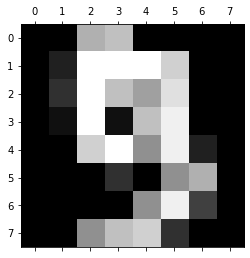

In [12]:
from sklearn.datasets import load_digits
import matplotlib
import matplotlib.pyplot as plt

digits = load_digits()
plt.gray()
plt.matshow(digits.images[9])

In [14]:

# 3 - make model
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data, target = load_digits(return_X_y=True)
#NCA
#Pipeline, Do this, then that, then this.
model = make_pipeline(
    StandardScaler(), 
    NeighborhoodComponentsAnalysis(n_components=2, 
    random_state=0))

In [15]:
# 3 - train model

model.fit(data, target)
# model.transform converts the 64 dimensions of the dataset, down to 2 dimensions.
# The n_components of the "NeighborhoodComponentsAnalysis" is what dimensions the transform converts the dimensions to.
data_embedded = model.transform(data)

In [36]:
# 3 - check accuracy of the data dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=1)

# Use a nearest neighbor classifier to evaluate the methods
# Majority voting system - n_neighbors=K of the closest. e.g. (Dog, Cat, Lion, Girafe, Dog) <- Most dogs, therfore it must be a dog.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(model.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(model.transform(X_test), y_test)

print(acc_knn)

0.8422222222222222


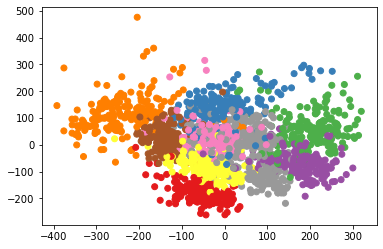

In [17]:

# 3 - show scatterplot

plt.figure()
# data_embedded[:,0] <= All rows for column 1 - AKA X axis
# data_embedded[:, 1] <= All rows for column 2 - AKA Y axis
# cmap = "Set1" <= Color map, Gives us colors on the plot.
plt.scatter(data_embedded[:,0], data_embedded[:, 1], c=target, cmap='Set1')
plt.show()

In [18]:

# 4
from sklearn.cluster import MeanShift
analyzer = MeanShift(bandwidth=80) 
analyzer.fit(data_embedded)


MeanShift(bandwidth=80, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [19]:

# 4.a
# Our analyzer found just as many clusters as the diagram up above.
import numpy as np
clusters = analyzer.labels_
print(np.unique(clusters))

[0 1 2 3 4 5 6 7 8]


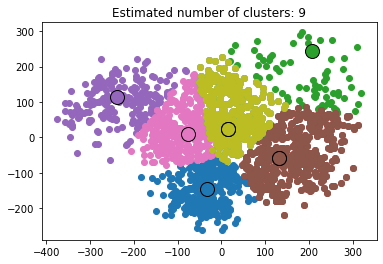

In [20]:
# Plot result
colors = "tab:blue tab:orange tab:green tab:red tab:purple tab:brown tab:pink tab:cyan tab:olive".split()
for k, col in zip(clusters, colors):
    picture = clusters == k
    cluster_center = analyzer.cluster_centers_[k]
    #Scatter plot
    plt.scatter(data_embedded[picture, 0], data_embedded[picture, 1], c=col)
    #Plots the centers
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % len(analyzer.cluster_centers_))
plt.show()